In [3]:
data_path = '../../../data/'

In [2]:
import pandas as pd
from tqdm import tqdm_notebook as tqdm

from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from matplotlib import pyplot as plt
from jupyterthemes import jtplot

C:\Users\nikitosoleil\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [4]:
jtplot.style('gruvboxd')

In [5]:
stopwords = stopwords.words('english')

In [6]:
ps = PorterStemmer()
stemmed = dict()

In [7]:
def process_text(text: str):
    ret = []
    for word in word_tokenize(str(text).lower()):
        if word.isalpha() and word not in stopwords:
            if word not in stemmed:
                stemmed[word] = ps.stem(word)
            ret.append(stemmed[word])
    return ret

In [8]:
que = pd.read_csv(data_path + 'questions.csv')
tag_que = pd.read_csv(data_path + 'tag_questions.csv')
tags = pd.read_csv(data_path + 'tags.csv')

In [10]:
merged = que.merge(tag_que, left_on = 'questions_id', right_on = 'tag_questions_question_id').merge(tags, left_on = 'tag_questions_tag_id', right_on = 'tags_tag_id')

In [11]:
merged

,questions_id,questions_author_id,questions_date_added,questions_title,questions_body,tag_questions_tag_id,tag_questions_question_id,tags_tag_id,tags_tag_name
0,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,2016-04-26 11:14:26 UTC+0000,Teacher career question,What is a maths teacher? what is a ma...,14147,332a511f1569444485cf7a7a556a5e54,14147,lecture
1,6c98bbce49714e53a488a27e95ca4132,1bdfc4d56b0641df8e6de875776e4e00,2016-04-26 11:10:03 UTC+0000,Aeronatical career question,What are the benifits of Aeronatical engineeri...,14147,6c98bbce49714e53a488a27e95ca4132,14147,lecture
2,90158e5f27634b22b6a47aa11022823c,8b482f833a1b4f8fbcad119644d0455d,2016-06-22 10:01:18 UTC+0000,is the teaching profession good?,"want to become a teacher, this profession is g...",14147,90158e5f27634b22b6a47aa11022823c,14147,lecture
3,336cd548d6c74d0e85f16fb823291b5e,a345aa36d2d542ce997471de5b397ed8,2016-05-23 11:30:49 UTC+0000,which study is important after 12th,to get a good study in futhure #engineers #lec...,14147,336cd548d6c74d0e85f16fb823291b5e,14147,lecture
4,7968ee578931470fbdcf46fb4f106332,ea2dead92a7741769302f7cdb54d83f7,2016-04-22 04:13:04 UTC+0000,Medical Colleges?,Hi. I am student from Govt Hr sec school. Can ...,14147,7968ee578931470fbdcf46fb4f106332,14147,lecture
5,a71a1202dbb84b88ac1b090d9c033dc8,72477b4990204ac0a73f6deb0c70b301,2016-06-23 09:56:36 UTC+0000,what i want to study for mechanical engineering?,"engineers,scientist,teachers #teaching #teache...",14147,a71a1202dbb84b88ac1b090d9c033dc8,14147,lecture
6,6b33839d98aa4feda981e11d5a11b274,1bdfc4d56b0641df8e6de875776e4e00,2016-04-29 08:37:28 UTC+0000,aeronatical career question,How to become a good pilot? What are the qual...,14147,6b33839d98aa4feda981e11d5a11b274,14147,lecture
7,7454c66070eb4babaa2f3db2644ab680,ea2dead92a7741769302f7cdb54d83f7,2016-04-20 11:53:52 UTC+0000,Doctors cutoff?,I am doing my 12th standard(Biology Group) in ...,14147,7454c66070eb4babaa2f3db2644ab680,14147,lecture
8,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,2016-04-26 11:14:26 UTC+0000,Teacher career question,What is a maths teacher? what is a ma...,27490,332a511f1569444485cf7a7a556a5e54,27490,college
9,5af8880460c141dbb02971a1a8369529,aa9eb1a2ab184ebbb00dc01ab663428a,2017-09-01 02:36:54 UTC+0000,Are there any scholarships out there for stude...,I'm trying to find scholarships for first year...,27490,5af8880460c141dbb02971a1a8369529,27490,college


In [13]:
tag_que.tag_questions_question_id.value_counts()

e79bf4570af646d5892cf42b031c2a52    54
2ea130631ba34b4181c5fd85816504cf    53
e1860d4512b746a19270e5675efb7b44    52
164522e7595649729deebf48cad87e1b    47
0da559c9445e4ad59a98611e164c3ddd    44
f012afc8eb3b4c659a546f742dbf5d76    43
9d0eb636cea3488486610252a494f005    38
be0bac33e0594b21ac1f82fe2ffac7fb    27
ff2001540cc841818d434284446f2d7b    27
570fbe3b01b7496d9ab142abf766e557    26
1f85494d59404d2aa3fcfb4306255c50    24
e5b4748aff864f3a850ac468f471e02e    24
c1795b5ae22043cea52d2420a596c149    23
f2ff1183ce004206943b54dcff1faab4    23
4bb237244e6e4ddfa91bc652db176456    23
4eb64ed1527847f29d3e3d8a713bb3dc    22
511a0381fec847749776c897b4e5598d    21
8b540e08be184be099447b715106a15e    20
9e56e46e91f64909a42a6a01e68ece6f    20
9d94728c80a74860b1c93d96ff2e9ba0    20
7f8782e852ec4c18b5de4cfd73933dea    20
aa9fa1f990c145e4834ea033fedf3e50    19
5f3265e08aa64a528910e3da7940056e    19
f7a249ea11bb4235bd048f5dbe997b14    19
e213d60f01544896a37f0b413d96e2ce    19
469a9f8753ec483784cf87d22

In [16]:
merged.tags_tag_name.value_counts()

college                      3744
career                       1566
medicine                     1324
engineering                  1083
business                      989
doctor                        946
college-major                 783
science                       701
nursing                       692
psychology                    679
healthcare                    638
medical                       545
teaching                      520
engineer                      505
technology                    504
finance                       472
education                     470
teacher                       465
biology                       464
career-counseling             461
scholarships                  441
law                           433
nurse                         430
computer-science              399
jobs                          385
hospital-and-health-care      372
college-advice                371
money                         364
internships                   361
computer      

In [17]:
merged.tags_tag_name.value_counts().where(lambda x: x>5).dropna().sum()

67091.0

In [7]:
prof = pd.read_csv(data_path + 'professionals.csv')

In [8]:
prof['professionals_industry'] = prof['professionals_industry'].apply(process_text)
prof['professionals_industry'] = prof['professionals_industry'].apply(lambda x: ' '.join((x + ['', ''])[:3]))

In [12]:
prof['professionals_headline'] = prof['professionals_headline'].apply(process_text)

In [23]:
considerable = set(prof.professionals_industry.value_counts().where(lambda x: x>10).dropna().index)

In [24]:
len(considerable)

151

In [26]:
filtered = prof[prof.professionals_industry.isin(considerable)]

In [29]:
filtered

,professionals_id,professionals_location,professionals_industry,professionals_headline,professionals_date_joined
0,9ced4ce7519049c0944147afb75a8ce3,NaN,nan,[nan],2011-10-05 20:35:19 UTC+0000
1,f718dcf6d2ec4cb0a52a9db59d7f9e67,NaN,nan,[nan],2011-10-05 20:49:21 UTC+0000
2,0c673e046d824ec0ad0ebe012a0673e4,"New York, New York",nan,[nan],2011-10-18 17:31:26 UTC+0000
3,977428d851b24183b223be0eb8619a8c,"Boston, Massachusetts",nan,[nan],2011-11-09 20:39:29 UTC+0000
4,e2d57e5041a44f489288397c9904c2b2,NaN,nan,[nan],2011-12-10 22:14:44 UTC+0000
5,c9bfa93898594cbbace436deca644c64,NaN,nan,[nan],2011-12-12 14:25:46 UTC+0000
6,ed85488fb5e941eaa97014137fcbf317,NaN,nan,[nan],2011-12-28 03:02:04 UTC+0000
7,102fb92c28034ad988b593d0111cb4bb,NaN,nan,[nan],2011-12-26 05:00:00 UTC+0000
8,5a4a16842ec64430ac3f916aacf35fe1,NaN,nan,[nan],2011-12-26 05:00:00 UTC+0000
9,81999d5ad93549dab55636a545e84f2a,NaN,nan,[nan],2011-12-26 05:00:00 UTC+0000


In [30]:
prepared = [TaggedDocument(row.professionals_headline, [row.professionals_industry]) for i, row in filtered.iterrows()]

In [31]:
d2v = Doc2Vec(prepared, vector_size = 10, workers = 4, iter = 20, dm = 0)

C:\Users\nikitosoleil\Anaconda3\lib\site-packages\gensim\models\doc2vec.py:362: UserWarning: The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.
  warnings.warn("The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.")


In [32]:
proj = TSNE(n_components = 2, verbose = 1).fit_transform(d2v.docvecs.vectors_docs)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 151 samples in 0.000s...


C:\Users\nikitosoleil\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:316: RuntimeWarning: invalid value encountered in sqrt
  result = np.sqrt(dist[sample_range, neigh_ind]), neigh_ind


[t-SNE] Computed neighbors for 151 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 151 / 151
[t-SNE] Mean sigma: 1.350896
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.312309
[t-SNE] KL divergence after 1000 iterations: 0.487048


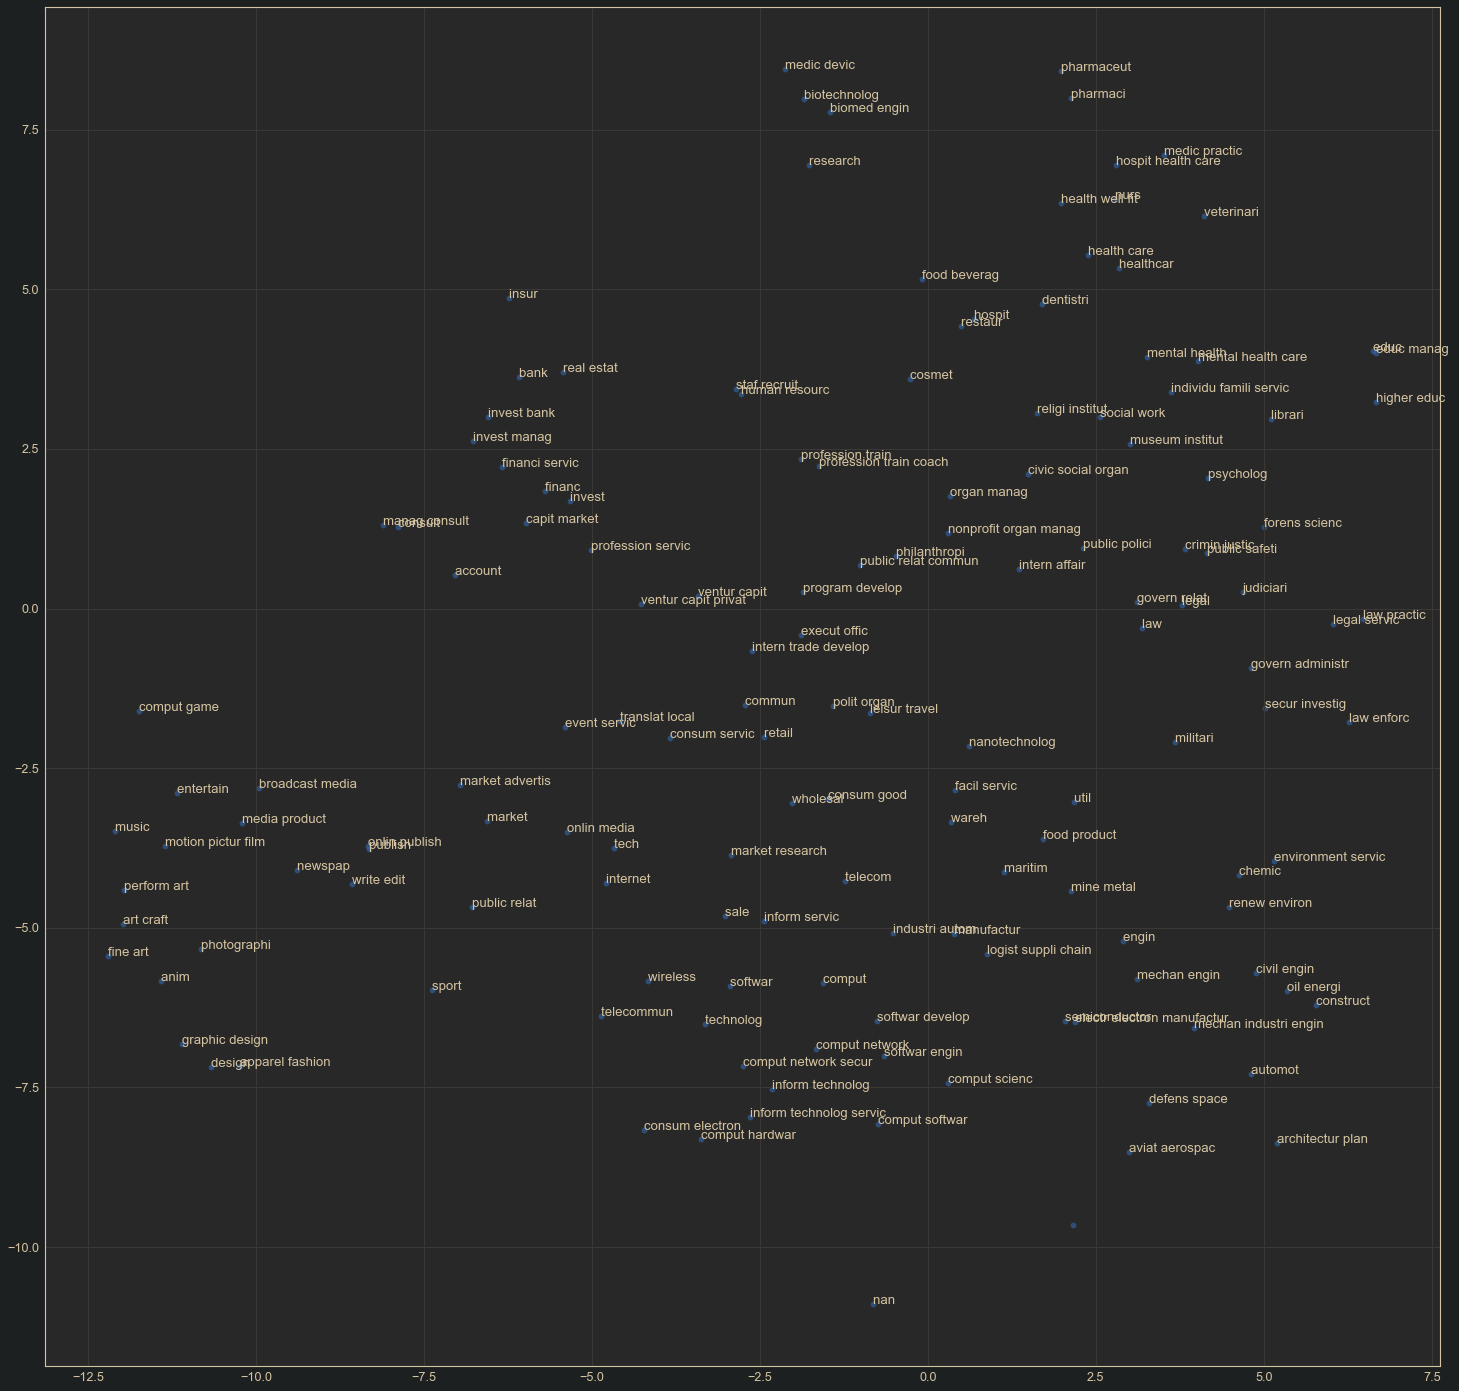

In [34]:
fig, ax = plt.subplots(figsize = (25, 25))

plt.scatter(proj[:, 0], proj[:, 1], alpha = 0.5)

for i, name in tqdm(enumerate(d2v.docvecs.index2entity)):
    ax.annotate(name, (proj[i, 0], proj[i, 1]))

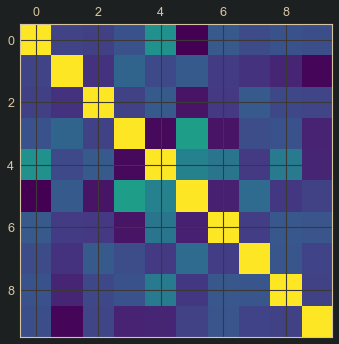

In [37]:
plt.matshow(pd.DataFrame(d2v.docvecs.vectors_docs).corr())

In [38]:
pd.DataFrame(d2v.docvecs.vectors_docs).corr()

,0,1,2,3,4,5,6,7,8,9
0,1.000000,-0.035692,-0.055888,0.022562,0.356341,-0.303491,0.058110,0.001442,0.025763,0.011538
1,-0.035692,1.000000,-0.114037,0.117595,-0.017782,0.063505,-0.076305,-0.110311,-0.169280,-0.284040
2,-0.055888,-0.114037,1.000000,-0.052875,0.063188,-0.234040,-0.088957,0.067179,-0.021462,-0.033259
3,0.022562,0.117595,-0.052875,1.000000,-0.271686,0.424020,-0.232472,0.002109,0.026150,-0.173560
4,0.356341,-0.017782,0.063188,-0.271686,1.000000,0.269596,0.202032,-0.080058,0.232270,-0.168360
5,-0.303491,0.063505,-0.234040,0.424020,0.269596,1.000000,-0.190607,0.153296,-0.094563,-0.049348
6,0.058110,-0.076305,-0.088957,-0.232472,0.202032,-0.190607,1.000000,-0.064768,0.050642,0.041133
7,0.001442,-0.110311,0.067179,0.002109,-0.080058,0.153296,-0.064768,1.000000,0.047027,-0.039171
8,0.025763,-0.169280,-0.021462,0.026150,0.232270,-0.094563,0.050642,0.047027,1.000000,-0.049007
9,0.011538,-0.284040,-0.033259,-0.173560,-0.168360,-0.049348,0.041133,-0.039171,-0.049007,1.000000
